## ML P1: LOAN APPROVED OR NOT USING DECISION TREE CLASSIFICATION

In [7]:
# LOAN APPROEVD OR NOT USING DECISION TREE CLASSIFICATION

# import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
df = pd.read_csv('E:/Ducat/Machine Learning/loan_approval_dataset.csv')

# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# rename 'loan_status' column to 'loan'
df.rename(columns={'loan_status':'loan'}, inplace=True)

# Encode the 'loan' column using LabelEncoder
encoder = LabelEncoder()
df['loan'] = encoder.fit_transform(df['loan'])
df['education'] = encoder.fit_transform(df['education'])
df['self_employed'] = encoder.fit_transform(df['self_employed'])

# Select only numerical columns for analysis
df1 = df.select_dtypes(['int', 'float'])

# Check for null values
df.isnull().sum()

# Select feature columns and target column
t = df.select_dtypes(['int','float'])
x = t.iloc[:, 1:10]  # Features (all integer columns except the last one)
y = t.iloc[:, -1]    # Target ('loan' clumn, the last integer column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Initialize and train the Decision Tree Classifier
cls = DecisionTreeClassifier(criterion='entropy', random_state=0)
cls.fit(x_train, y_train)

# Make predictions
y_pred = cls.predict(x_test)

# Evaluate the model using confusion matrix and accuracy score
results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(results)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Plot the decision tree
# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(cls)
# plt.show()

Confusion Matrix:
[[765  10]
 [ 18 488]]
Accuracy Score: 0.9781420765027322


In [74]:
# import all library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [76]:
# Load and print the dataset 
df = pd.read_csv('E:/Ducat/Machine Learning/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [78]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

In [80]:
# rename 'loan_status' column to 'loan'
df.rename(columns={'loan_status':'loan'}, inplace=True)

In [82]:
# Encode the column using LabelEncoder
encoder = LabelEncoder()
df['loan'] = encoder.fit_transform(df['loan'])
df['education'] = encoder.fit_transform(df['education'])
df['self_employed'] = encoder.fit_transform(df['self_employed'])

In [84]:
# Select only numerical columns for analysis
df1 = df.select_dtypes(['int', 'float'])

In [86]:
# Check for null values
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan                        0
dtype: int64

In [88]:
# # Select feature columns
t = df.select_dtypes(['int'])
x = df1.drop(columns=['loan'])  # Drop target column
x

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [90]:
# select target column
y = df1['loan']  # Target column
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan, Length: 4269, dtype: int32

In [92]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [94]:
# Initialize and train the Decision Tree Classifier
cls = DecisionTreeClassifier(criterion='entropy', random_state=0)
cls.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:
# Make predictions
y_pred = cls.predict(x_test)

In [98]:
# Evaluate the model using confusion matrix and accuracy score
results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(results)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
[[647  12]
 [ 11 398]]
Accuracy Score: 0.9784644194756554


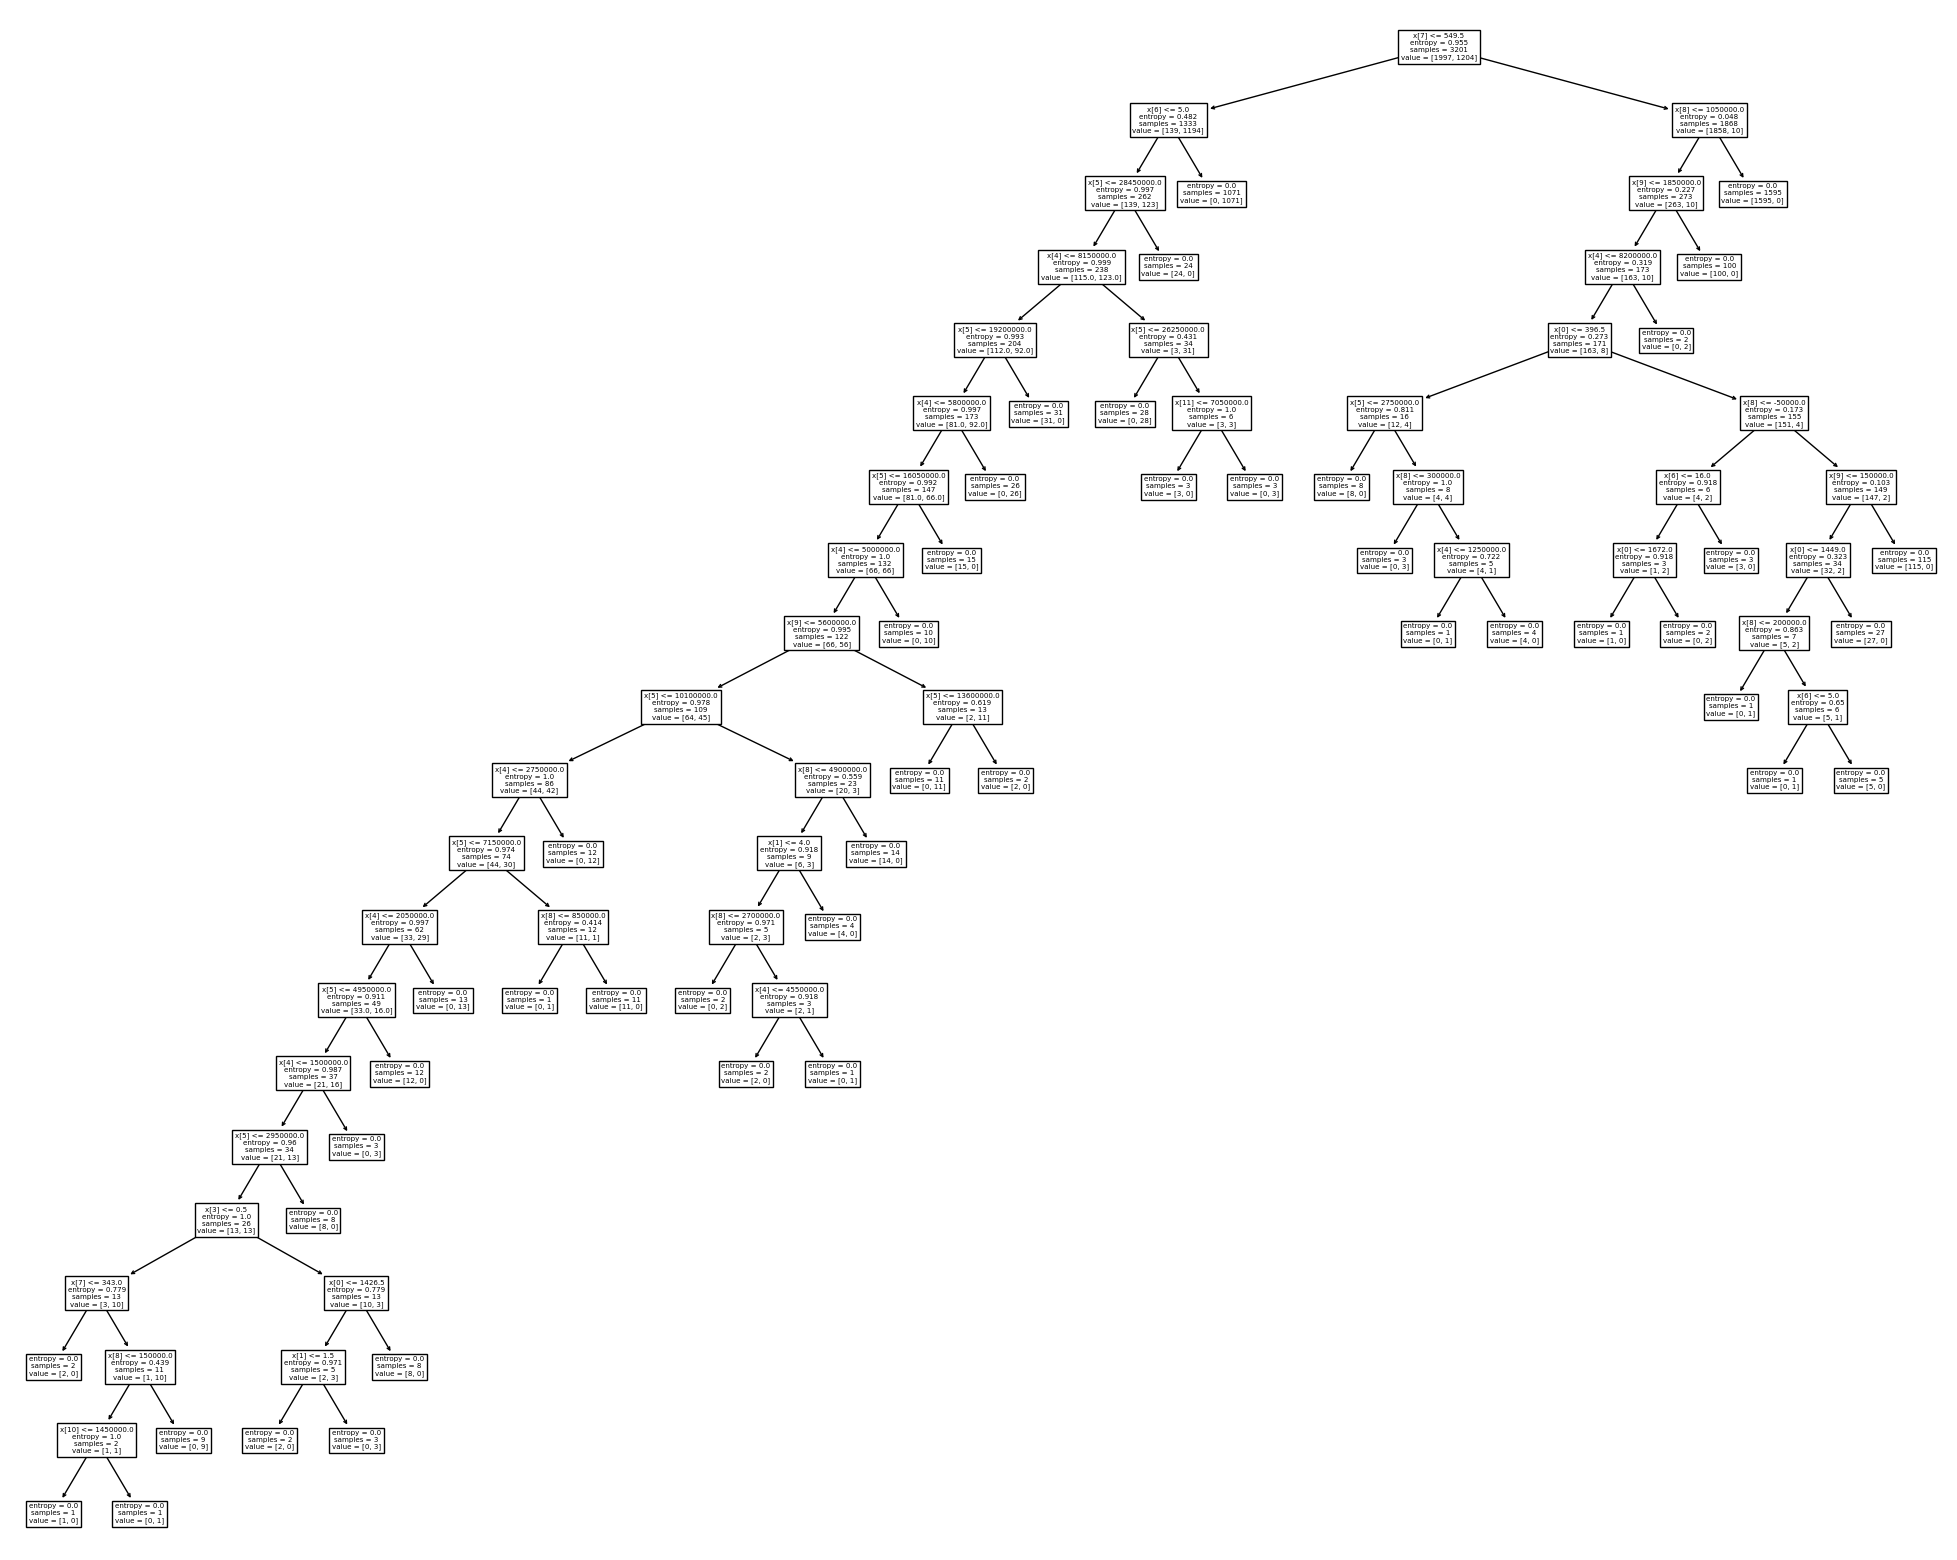

In [100]:
# Plot the decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(cls)
plt.show()

### Loan Approval Prediction using Decision Tree Classifier

In this project, I built a machine learning model using a Decision Tree Classifier to predict whether a loan application
would be approved or not, based on various features in a dataset.

#### Steps Involved:

1. **Data Loading and Preprocessing:**
   - I loaded the dataset (`loan_approval_dataset.csv`) using pandas.
   - Removed any leading/trailing spaces from column names for cleanliness.
   - Renamed the `loan_status` column to `loan` for better understanding of the target variable.

2. **Label Encoding:**
   - Used the `LabelEncoder` from `sklearn` to convert categorical variables (`loan`, `education`, `self_employed`) into
     numerical values. This is necessary for the decision tree model, as it only works with numerical data.

3. **Data Cleaning:**
   - Checked for null values in the dataset to ensure there were no missing data points.

4. **Feature Selection:**
   - Selected the numerical columns from the dataset for analysis, which included both features and the target variable.
   - The feature set `X` consisted of all the numerical columns (except the target), and the target `Y` was the `loan`
     column.

5. **Train-Test Split:**
   - Split the data into a training set (70%) and a testing set (30%) using `train_test_split` to ensure the model is 
     evaluated on unseen data.

6. **Model Training:**
   - Used the Decision Tree Classifier with the `entropy` criterion for splitting nodes. The classifier was trained on
     the training data.

7. **Prediction and Evaluation:**
   - Used the trained model to predict loan approvals on the test data.
   - Evaluated the models performance using a confusion matrix and accuracy score.

   **Confusion Matrix:**
   - True positives: 488 (loans approved correctly)
   - True negatives: 765 (loans rejected correctly)
   - False positives: 10 (incorrectly predicted rejection)
   - False negatives: 18 (incorrectly predicted approval)

   The model achieved an accuracy score of 97.8%, indicating it performs very well in predicting loan approvals.

8. **Visualization:**
   - I also included code to plot the decision tree, although it is commented out. If executed, this would allow us to
     visualize how the tree makes decisions based on different features.

#### Key Insights:
- The model is performing exceptionally well with a high accuracy score of 97.8%.
- The confusion matrix shows very few false positives and false negatives, meaning the model is accurate in classifying
  both approved and rejected loans.

This project demonstrates the process of building a classification model from scratch, using data preprocessing,
model training, evaluation, and visualization techniques.
